In [165]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [166]:
data=pd.read_csv('C:/Users/Taha/Downloads/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [167]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [168]:
data.shape

(768, 9)

In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# No missing values




In [170]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [171]:
#Age=data[data['Age']>=21]


In [172]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# notice that there are zeros in SkinThickness ,Insulin and some columns , did it make sense ?
# zeros are missing values
# I'll replace 0 with nan

In [173]:
data[['Glucose' ,'BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','SkinThickness']]=data[['Glucose' ,'BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','SkinThickness']].replace(0,np.NaN)


# صدقت كلام عمك الضو ؟

In [174]:
data.isnull().any()

Pregnancies                 False
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

# distplot columns to know which method we'll use to fill nan and also to know distribution

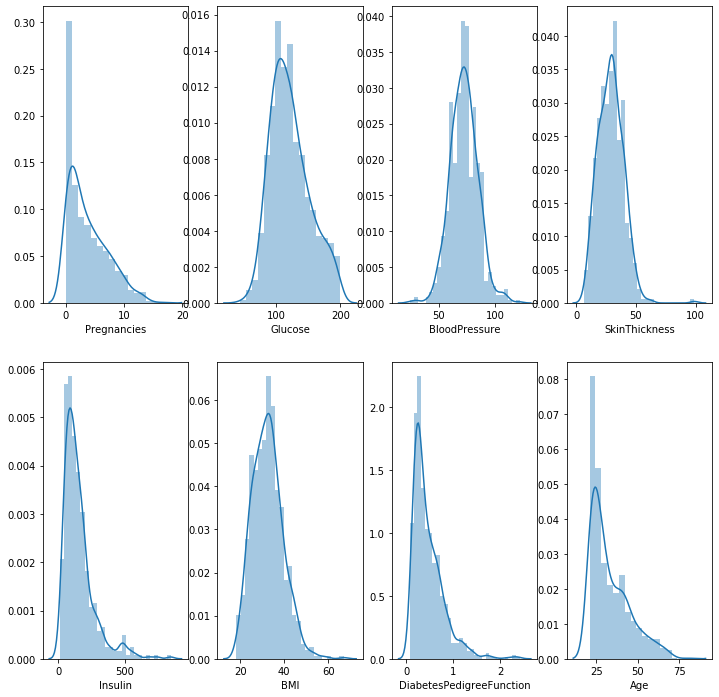

In [175]:
fig , ax2 = plt.subplots(2,4,figsize=(12,12))
sns.distplot(data['Pregnancies'] , ax=ax2[0][0])
sns.distplot(data['Glucose'] , ax=ax2[0][1])
sns.distplot(data['BloodPressure'] , ax=ax2[0][2])
sns.distplot(data['SkinThickness'] , ax=ax2[0][3])
sns.distplot(data['Insulin'] , ax=ax2[1][0])
sns.distplot(data['BMI'] , ax=ax2[1][1])
sns.distplot(data['DiabetesPedigreeFunction'] , ax=ax2[1][2])
sns.distplot(data['Age'] , ax=ax2[1][3])


# here I fill missing values but this method doesn't make sense to knn مش عارف ليه مع انها حلوه وبسمسم

In [176]:
#for col in ['Glucose' ,'Insulin','BMI','DiabetesPedigreeFunction','SkinThickness']:
 #   data[col].replace(np.NaN , data[col].mean(), inplace = True)
#data.head()   

In [177]:

x = np.round(data[data['Outcome'] == 1][['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']].mean())
y = np.round(data[data['Outcome'] == 0][['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']].mean())
data.loc[data['Outcome'] == 1,['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']] = data.loc[data['Outcome'] == 1,['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']].replace(np.NaN,x)
data.loc[data['Outcome'] == 0,['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']] = data.loc[data['Outcome'] == 0,['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']].replace(np.NaN,y)


# create AgeRange column and groupby it

In [178]:
data['AgeRange']= [np.floor(i/10)*10 for i in data['Age']]
data1=data.groupby('AgeRange' , as_index=False)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeRange
0,6,148.0,72.0,35.0,207.0,33.6,0.627,50,1,50.0
1,1,85.0,66.0,29.0,130.0,26.6,0.351,31,0,30.0
2,8,183.0,64.0,33.0,207.0,23.3,0.672,32,1,30.0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,20.0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,30.0


# Calculate patient's percentage 
# About 21% in twenties have the disease
# About 46% in thirties have the disease
# About 55% in forties have the disease
# About 59% in fifties have the disease
# About 27% in sexties have the disease
# About 50% in seventies have the disease
# About 0% in eighties have the disease


In [179]:
data1.agg({'Outcome' : 'mean'}).head(7)


,AgeRange,Outcome
0,20.0,0.212121
1,30.0,0.460606
2,40.0,0.550847
3,50.0,0.596491
4,60.0,0.275862
5,70.0,0.500000
6,80.0,0.000000


# مالوش لازمه خلاص

In [180]:
data.drop('AgeRange' , axis =1 , inplace = True)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,207.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,130.0,26.6,0.351,31,0
2,8,183.0,64.0,33.0,207.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


# Number of diabetic and healthy

In [181]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# countplot outcome

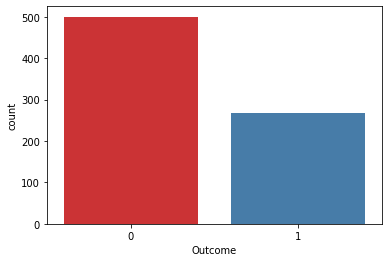

In [182]:
sns.countplot(x='Outcome',data=data, palette ='Set1')

# pie plot shows that 65.1%  not diabetic anf 34.9% diabetic

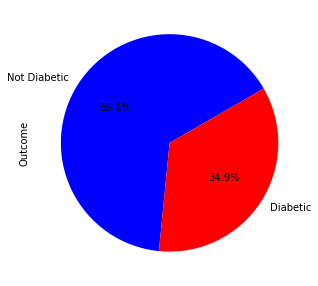

In [183]:
plt.figure(figsize=(5,5))
data['Outcome'].value_counts().plot.pie(labels =['Not Diabetic','Diabetic'] , autopct='%1.1f%%' , cmap='bwr' , startangle=30 )


# It's common that no relation between pregnancies and diabetes but the count plot proved that when pregnancies are over 6 times , rate of diabetic increase than rate of not diabetic

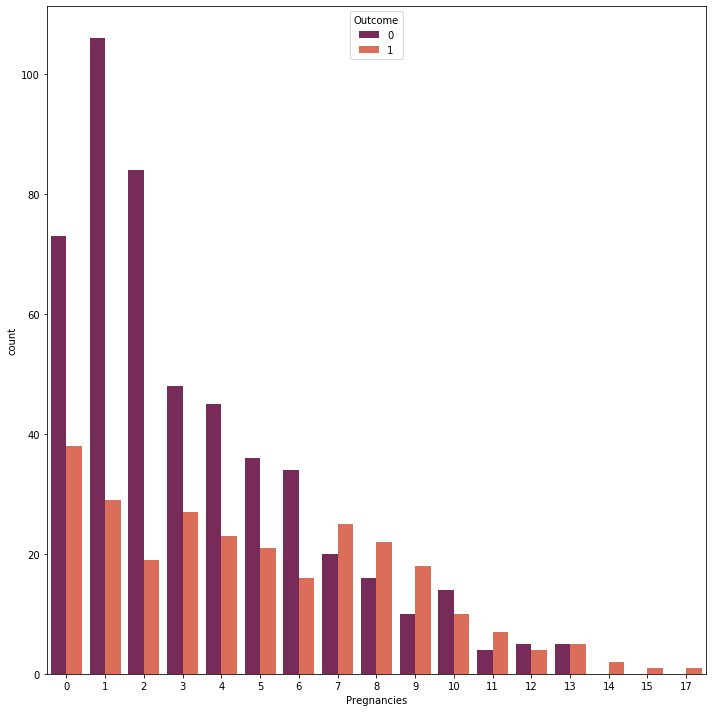

In [184]:
plt.figure(figsize=(10,10))
sns.countplot(data['Pregnancies'] , hue=data['Outcome'] ,palette ='rocket')
plt.tight_layout()

# Most of diabetic women between 21 to 54 years

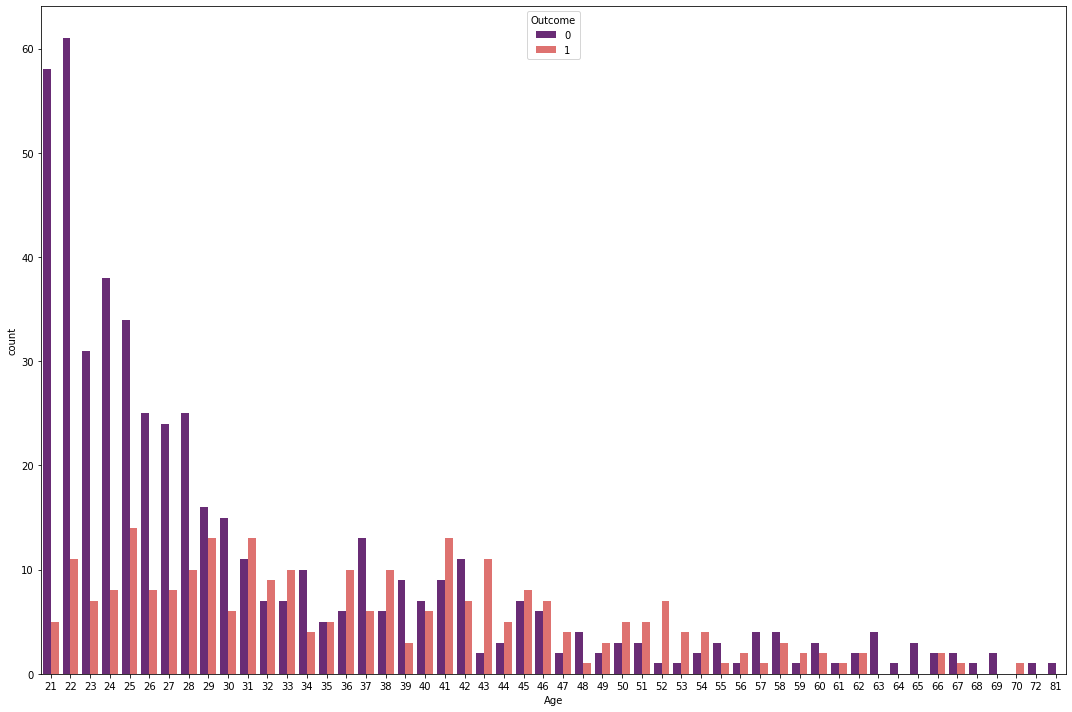

In [185]:
plt.figure(figsize=(15,10))
sns.countplot(data['Age'] , hue=data['Outcome'] ,palette ='magma')
plt.tight_layout()

# create histograms for each column with outcome
# in glucose , most of not diabetic have glucose = 100 , most of diabetic have glucose = 125 ( probably between 125 to 130 )
# in blood pressure , most of not diabetic have blood pressure = 65 , most of diabetic have blood pressure = 75
# in skin thickness , most of not diabetic have skin thikness = 25 , most of dianetic have skin thickness = 35
# in insulin , most of not diabetic have insulin = 160 , most of diabetic have insulin = 200
# in BMI , most of not diabetic have BMI = 25 , most of diabetic have BMI = 35
# in diabetes pedigree function , most of not diabetic have diabetes pedigree function = 0.25 , most of diabetic have Diabetes pedigree function = 0.30

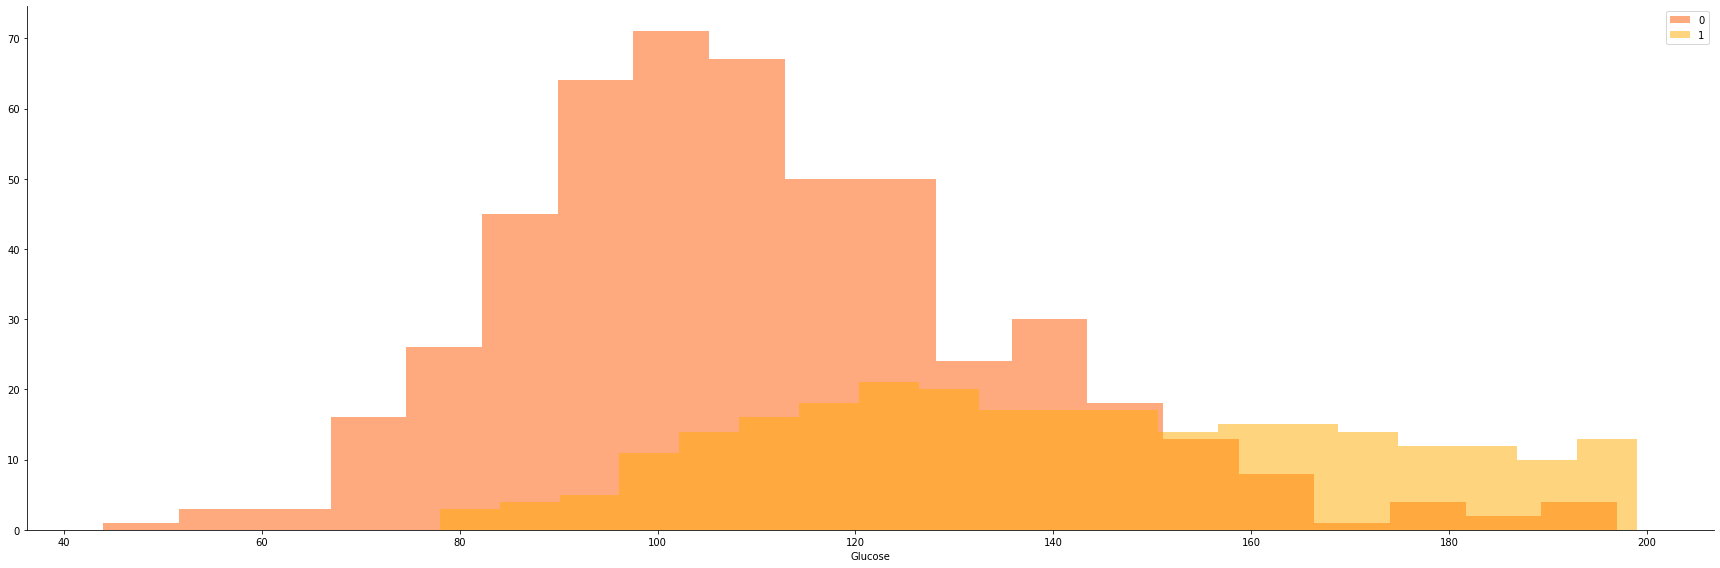

In [186]:
grid=sns.FacetGrid(data,hue='Outcome' , palette = 'autumn' , height=8 , aspect=3)
grid.map(plt.hist,'Glucose' ,bins=20, alpha = .5)
plt.legend()

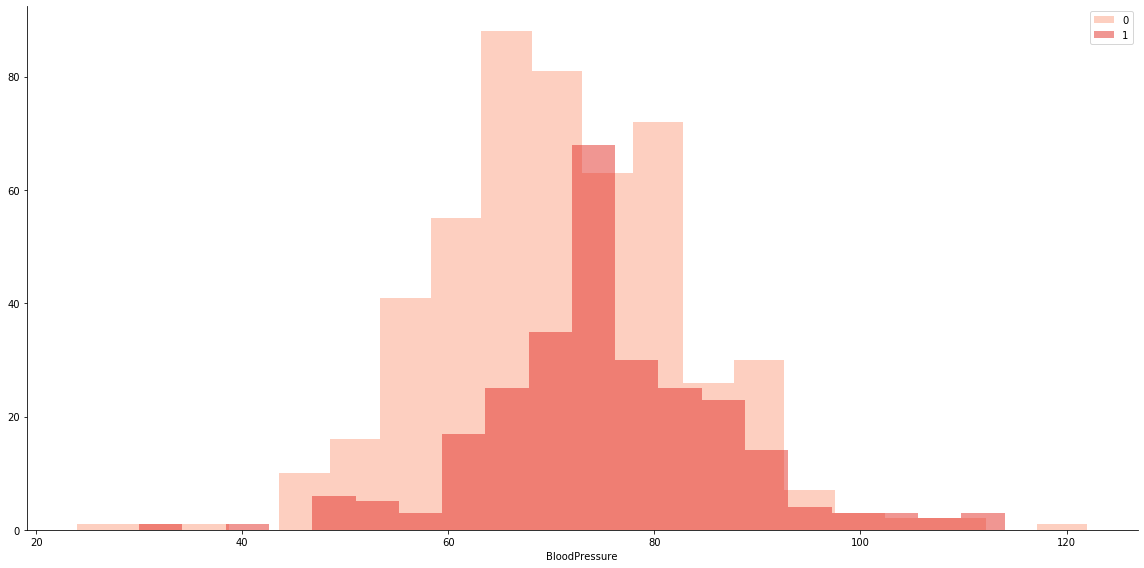

In [187]:
grid=sns.FacetGrid(data,hue='Outcome' , palette = 'Reds' , height=8 , aspect=2)
grid.map(plt.hist,'BloodPressure' ,bins=20, alpha = .5)
plt.legend()

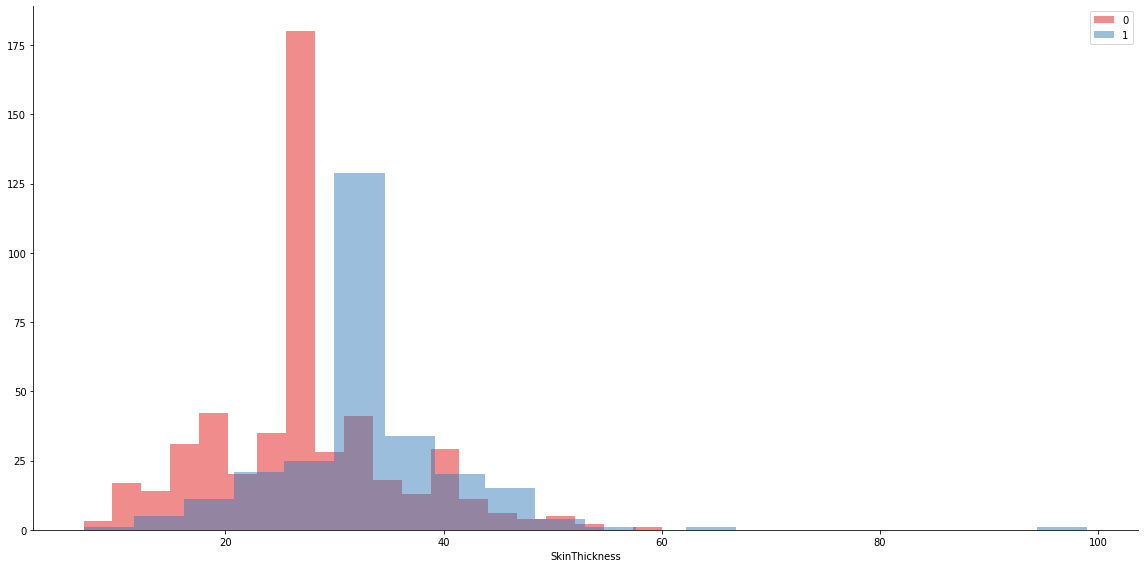

In [188]:
grid=sns.FacetGrid(data,hue='Outcome' , palette = 'Set1' , height=8 , aspect=2)
grid.map(plt.hist,'SkinThickness' ,bins=20, alpha = .5)
plt.legend()

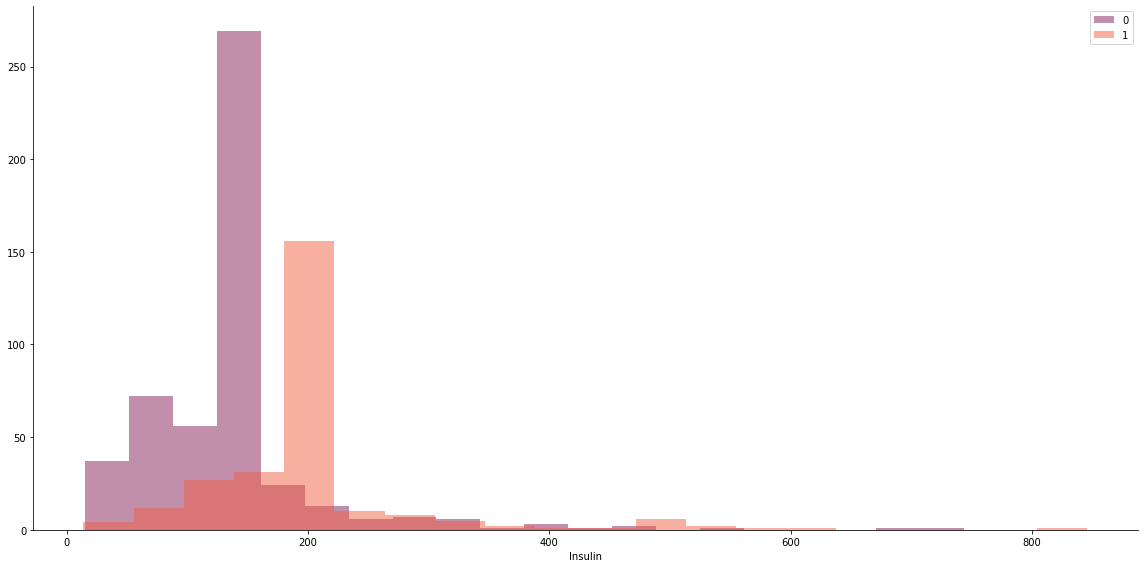

In [189]:
grid=sns.FacetGrid(data,hue='Outcome' , palette = 'rocket' , height=8 , aspect=2)
grid.map(plt.hist,'Insulin' ,bins=20, alpha = .5)
plt.legend()

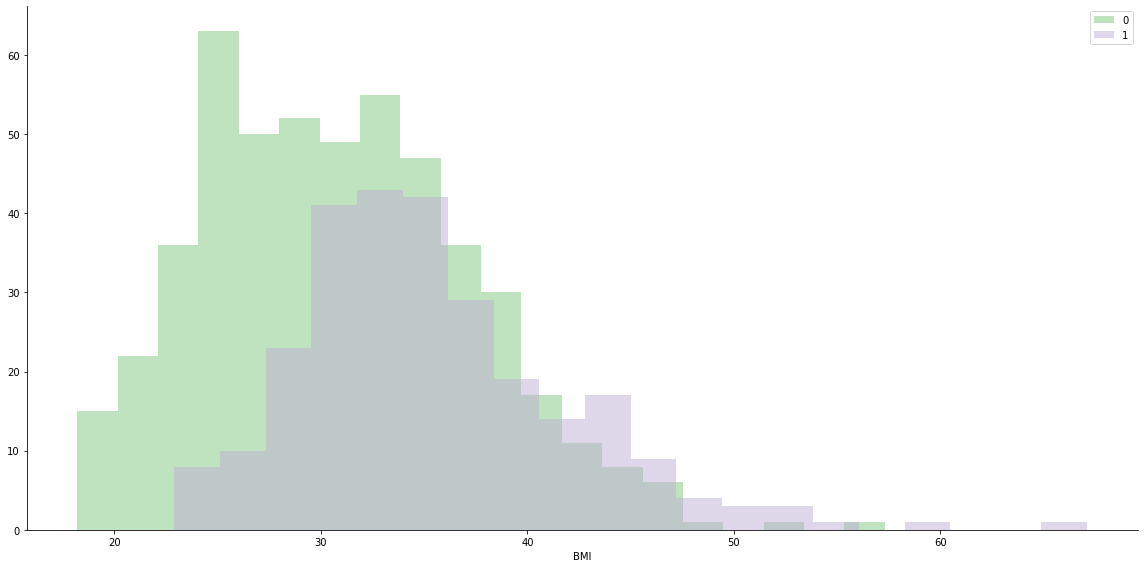

In [190]:
grid=sns.FacetGrid(data,hue='Outcome' , palette = 'Accent' , height=8 , aspect=2)
grid.map(plt.hist,'BMI' ,bins=20, alpha = .5)
plt.legend()

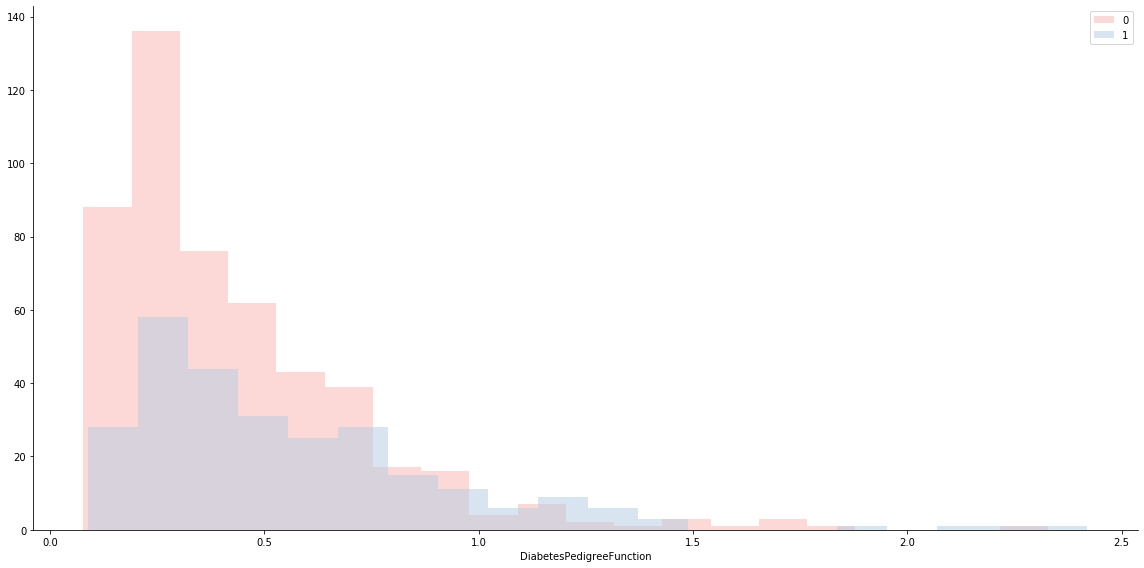

In [191]:
grid=sns.FacetGrid(data,hue='Outcome' , palette = 'Pastel1' , height=8 , aspect=2)
grid.map(plt.hist,'DiabetesPedigreeFunction' ,bins=20, alpha = .5)
plt.legend()

# Plots to analyze the dataset


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013ABEAA9288>,
      dtype=object)

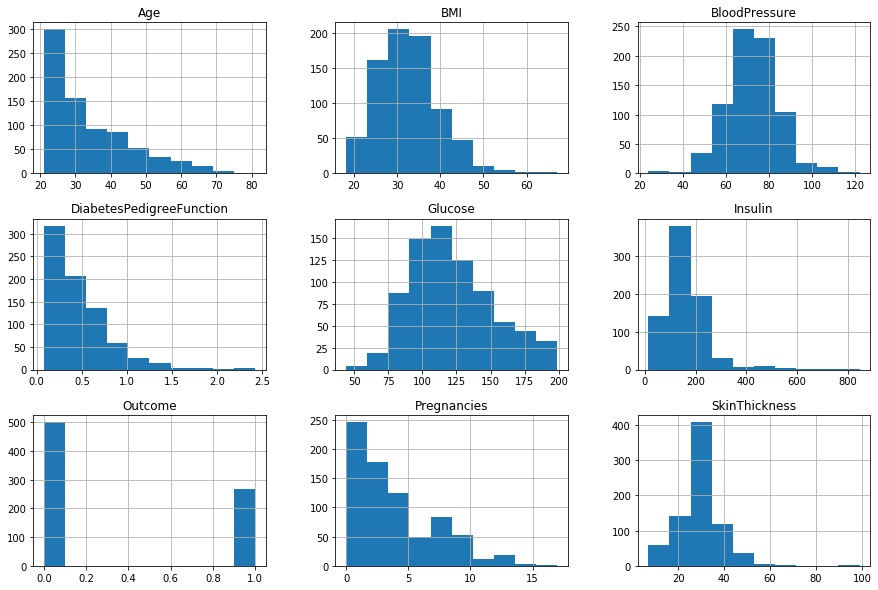

In [192]:
data.hist(figsize=(15,10))

# piarplot for all features

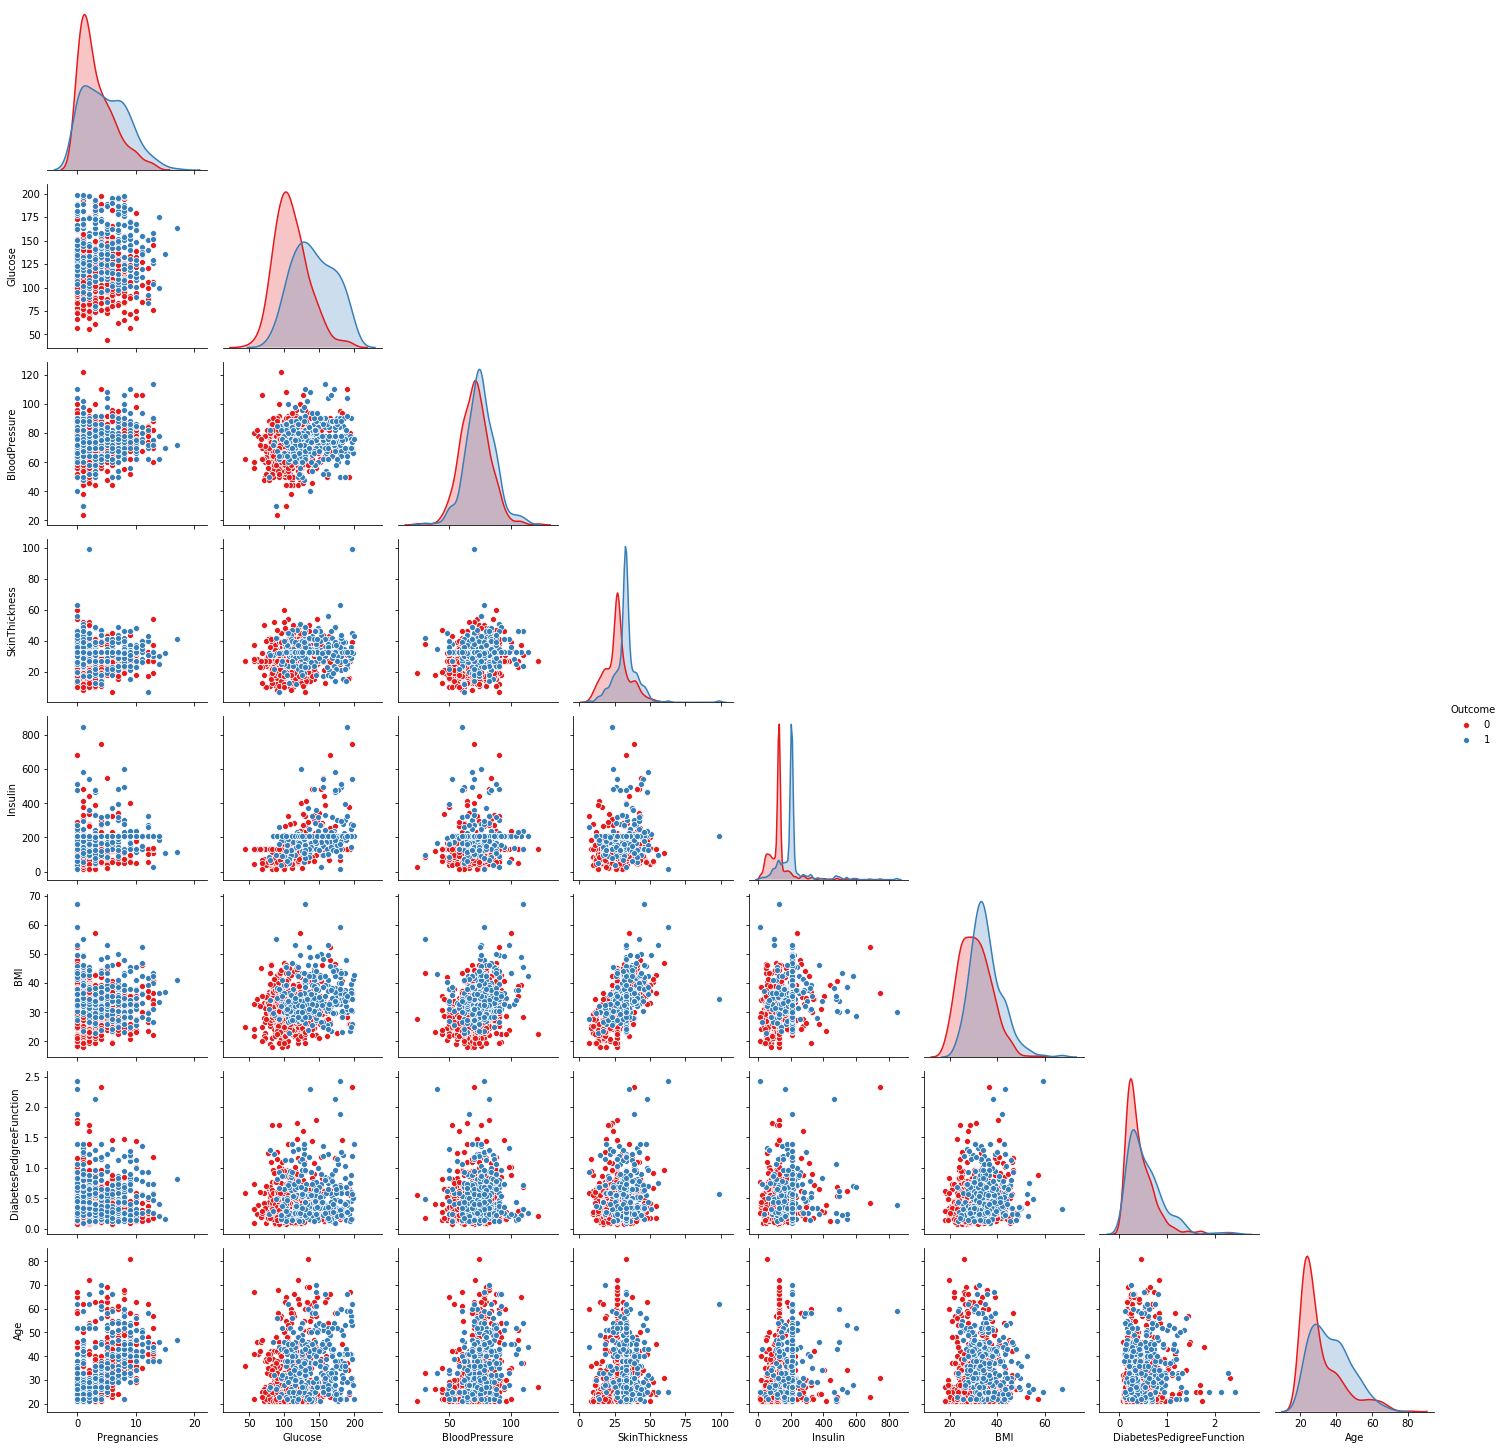

In [193]:
sns.pairplot(data , hue='Outcome' , palette='Set1' , corner = True)

# Outliers

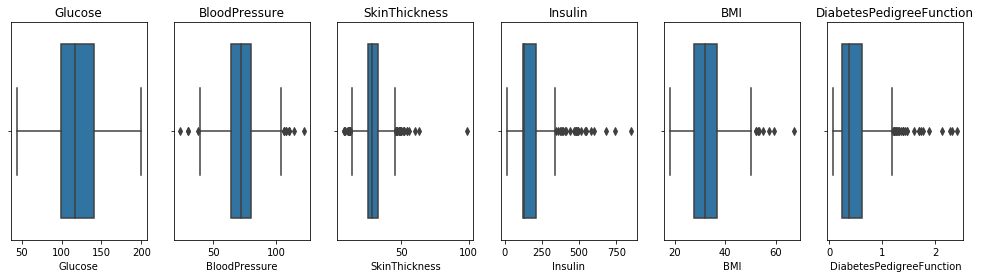

In [194]:
plt.figure(figsize=(20,4))
for i in np.arange(1,7):
    plt.subplot(1,7,i , title=data.columns[i])
    sns.boxplot(data[data.columns[i]]) 

 # Corrlation matrix 

In [195]:
corr=data.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129819,0.208917,0.093346,0.093595,0.023818,-0.033523,0.544341,0.221898
Glucose,0.129819,1.000000,0.223870,0.236193,0.498096,0.235073,0.138098,0.268517,0.495901
BloodPressure,0.208917,0.223870,1.000000,0.202531,0.099633,0.285962,-0.002286,0.324503,0.174175
SkinThickness,0.093346,0.236193,0.202531,1.000000,0.214032,0.566783,0.103666,0.134394,0.311242
Insulin,0.093595,0.498096,0.099633,0.214032,1.000000,0.231767,0.121949,0.165099,0.411877
BMI,0.023818,0.235073,0.285962,0.566783,0.231767,1.000000,0.152655,0.027357,0.314922
DiabetesPedigreeFunction,-0.033523,0.138098,-0.002286,0.103666,0.121949,0.152655,1.000000,0.033561,0.173844
Age,0.544341,0.268517,0.324503,0.134394,0.165099,0.027357,0.033561,1.000000,0.238356
Outcome,0.221898,0.495901,0.174175,0.311242,0.411877,0.314922,0.173844,0.238356,1.000000


# heatmap between corr features

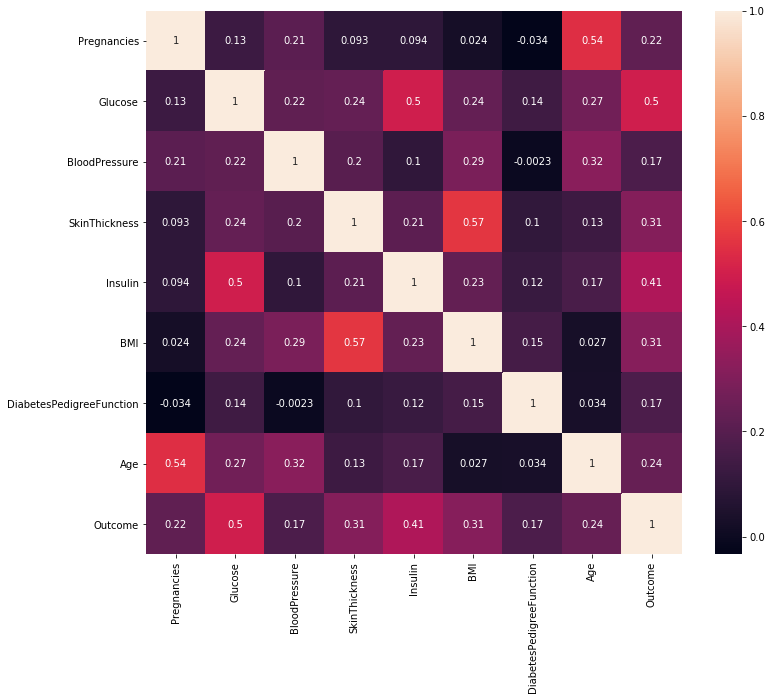

In [196]:
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True)

# violin plot

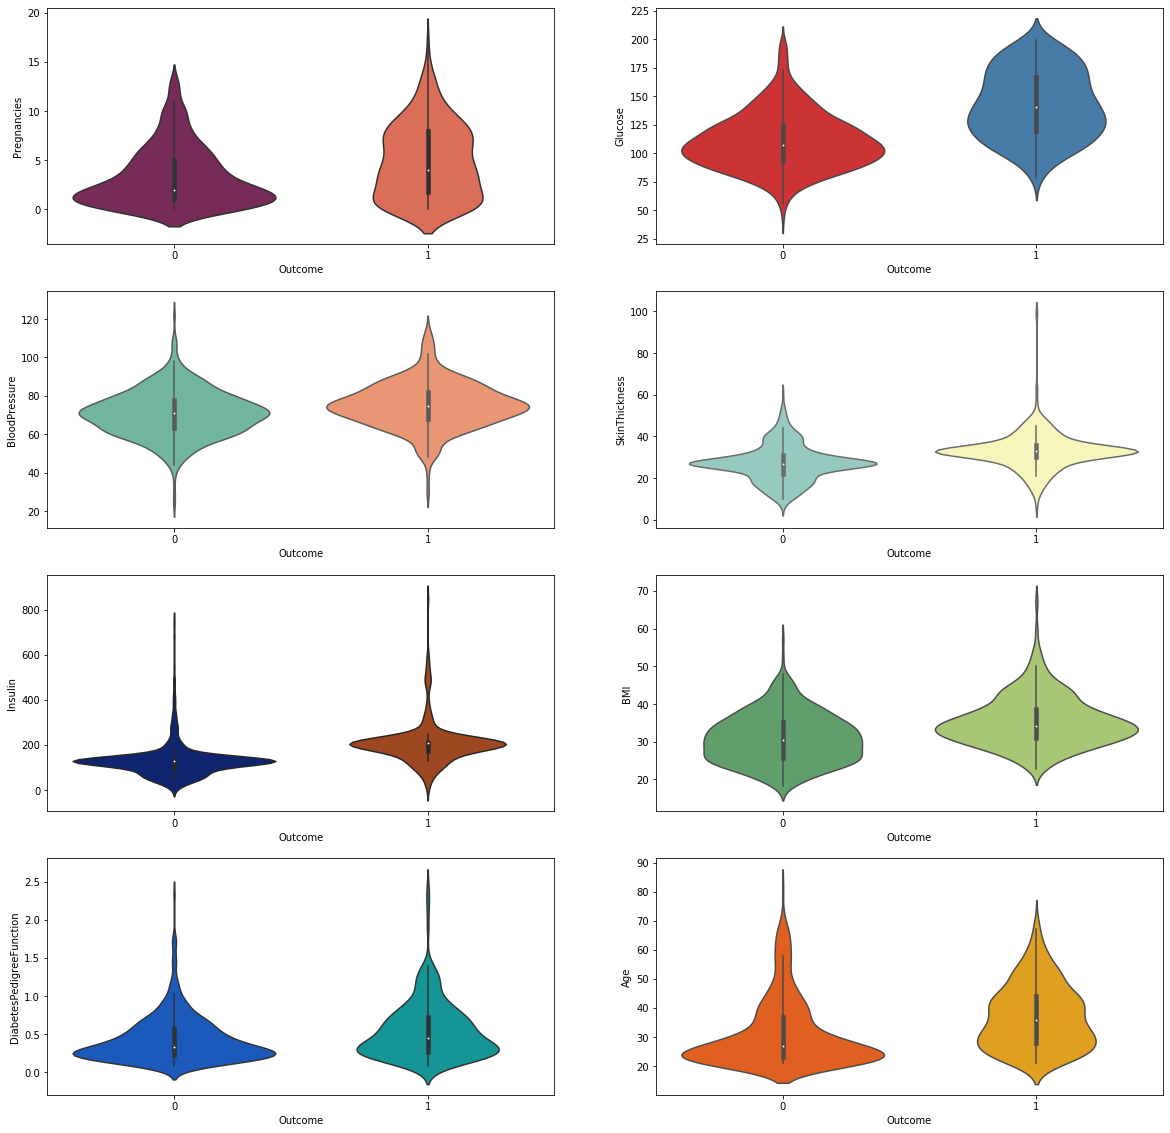

In [197]:
fig , ax2 = plt.subplots(4,2,figsize=(20,20))
sns.violinplot( x=data['Outcome'],y=data['Pregnancies'], ax=ax2[0][0] , palette = 'rocket')
sns.violinplot( x=data['Outcome'],y=data['Glucose'] , ax=ax2[0][1],palette = 'Set1')
sns.violinplot( x=data['Outcome'],y=data['BloodPressure'] , ax=ax2[1][0],palette = 'Set2')
sns.violinplot( x=data['Outcome'],y=data['SkinThickness'] , ax=ax2[1][1],palette = 'Set3')
sns.violinplot( x=data['Outcome'],y=data['Insulin'] , ax=ax2[2][0],palette = 'dark')
sns.violinplot( x=data['Outcome'],y=data['BMI'] , ax=ax2[2][1],palette = 'summer')
sns.violinplot( x=data['Outcome'],y=data['DiabetesPedigreeFunction'] , ax=ax2[3][0],palette = 'winter')
sns.violinplot(x=data['Outcome'],y=data['Age'] , ax=ax2[3][1],palette = 'autumn')


# create numpy arrays for features and target

In [198]:
x=data.drop('Outcome' , axis=1)
y=data['Outcome']

# Scikit-learn provides facility to split data into train and test set using train_test_split method

In [199]:
from sklearn.model_selection import train_test_split



# 80% training , 20% testing

In [200]:
x_train ,x_test,y_train ,y_test =train_test_split(x,y,test_size =.20 , random_state=42)


In [201]:
from sklearn.neighbors import KNeighborsClassifier


# train with knn algorithm

In [202]:
neighbors=np.arange(1,30)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))
for i , j in enumerate(neighbors):
    knn= KNeighborsClassifier(n_neighbors=j)
    knn.fit(x_train,y_train)
    train_accuracy[i]=knn.score(x_train,y_train)
    test_accuracy[i]=knn.score(x_test,y_test)

# Generate plot

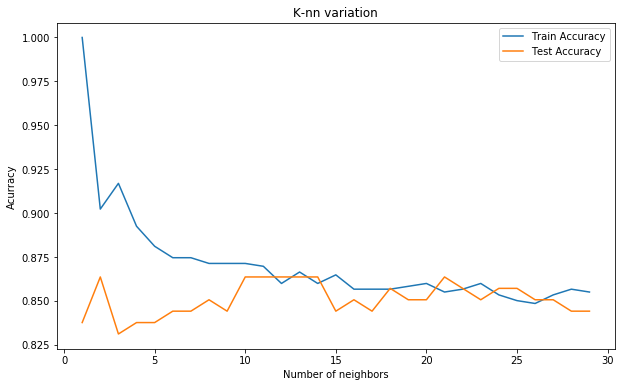

In [203]:
plt.figure(figsize=(10,6))
plt.plot(neighbors ,train_accuracy , label='Train Accuracy')
plt.plot(neighbors ,test_accuracy , label='Test Accuracy')
plt.title('K-nn variation')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Acurracy')
plt.show()

# notice that max testing accuracy = 12 , we put k = 12

In [204]:
knn= KNeighborsClassifier(n_neighbors=12)


# fit model

In [205]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

# calculate confusion matrix using the confusion_matrix method
# get the predictions using the classifier we had fit above

In [206]:
from sklearn.metrics import confusion_matrix
y_pred=knn.predict(x_test)

In [207]:
confusion_matrix( y_test,y_pred)

array([[92,  7],
       [14, 41]], dtype=int64)

# another way to get confusion matrix 



In [208]:
pd.crosstab(y_test ,y_pred  , rownames=['True'] , colnames=['Predictions'] , margins=True)

Predictions,0,1,All
True,,,
0,92,7,99
1,14,41,55
All,106,48,154


# calculate Classification report using the classification_report method and accuracy score using accuracy_score method

In [209]:
from sklearn.metrics import classification_report 


In [210]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        99
           1       0.85      0.75      0.80        55

    accuracy                           0.86       154
   macro avg       0.86      0.84      0.85       154
weighted avg       0.86      0.86      0.86       154



# plot the confusion matrix
# model predicted 92 persons haven't the disease and in real they it true 
# model predicted 7 persons haven't the disease and in real it false 
# model predicted that 14 persons have the disease and in real it false
# model predicted that 41 persons have the disease and in real it true 

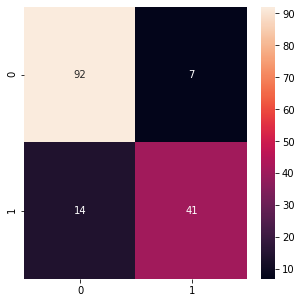

In [211]:
plt.figure(figsize=(5,5))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)) , annot=True)

# accuracy of model 

In [212]:
knn.score(x_test,y_test)


0.8636363636363636

# accuracy of model in another way

In [213]:
from sklearn.metrics import accuracy_score
print("Model's accuracy at K=12 is {} %".format(accuracy_score(y_test, y_pred)*100))


Model's accuracy at K=12 is 86.36363636363636 %


# انا انطفيت